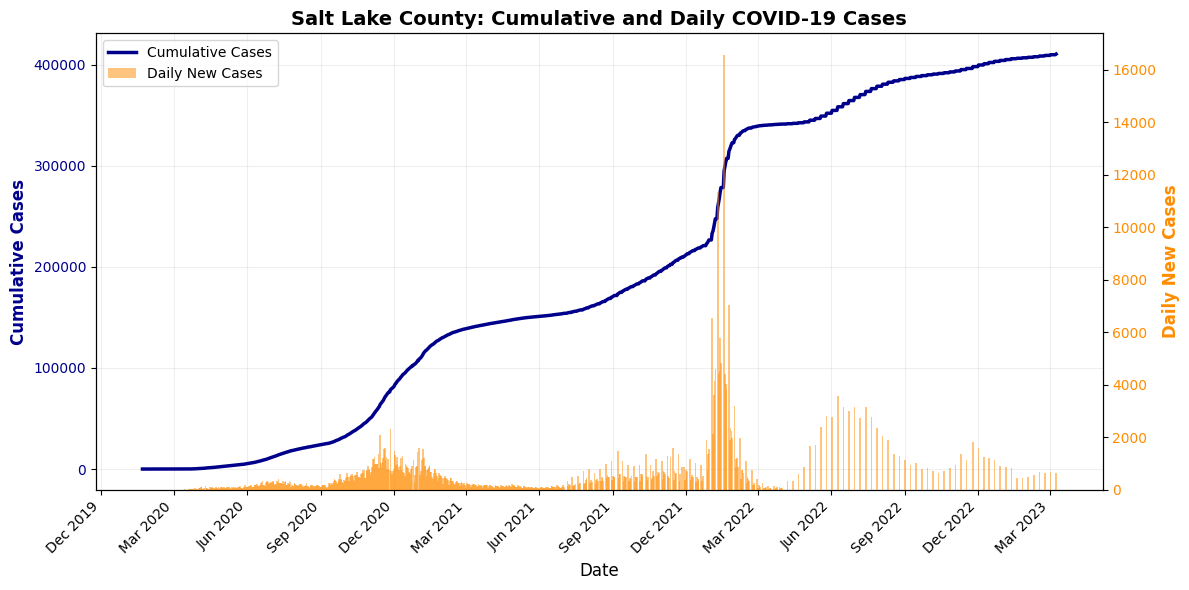

In [2]:
# Visualization 3: Cumulative and Daily Cases with Dual Axes

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load data from Downloads
covid_df = pd.read_csv('/Users/u1024341/Downloads/covid_data.csv')

# Visualization 3: Dual y-axis plot - Get Utah data and date columns
utah_data = covid_df[covid_df['Province_State'] == 'Utah'].copy()
date_columns = [col for col in covid_df.columns if '/' in col]
dates = pd.to_datetime(date_columns, format='%m/%d/%y')

# Select Salt Lake County
county_name = 'Salt Lake'
county_data = utah_data[utah_data['Admin2'] == county_name]

# Get cumulative cases
cumulative_cases = county_data[date_columns].values.flatten()

# Calculate daily new cases
daily_new_cases = np.diff(cumulative_cases, prepend=cumulative_cases[0])
daily_new_cases[daily_new_cases < 0] = 0  # Remove negative values

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot cumulative cases on left axis
color1 = 'darkblue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Cumulative Cases', color=color1, fontsize=12, fontweight='bold')
ax1.plot(dates, cumulative_cases, color=color1, linewidth=2.5, label='Cumulative Cases')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.2)

# Create second y-axis for daily cases
ax2 = ax1.twinx()
color2 = 'darkorange'
ax2.set_ylabel('Daily New Cases', color=color2, fontsize=12, fontweight='bold')
ax2.bar(dates, daily_new_cases, color=color2, alpha=0.5, label='Daily New Cases', width=2)
ax2.tick_params(axis='y', labelcolor=color2)

# Format dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Title
plt.title(f'{county_name} County: Cumulative and Daily COVID-19 Cases', 
          fontsize=14, fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

fig.tight_layout()
plt.show()